In [2]:
import sys
sys.path.append("/mnt/c/Users/dambr/Desktop/AstroCosmoComputational/Students/Anna_DAmbrosio/")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import your integration methods
from pyACC.Calculus import *

# Import integration class
from pyACC.cosmology import *

import scipy as sp
from scipy import interpolate
from scipy.misc import derivative

from random import randint

import corner
import pygtc
import getdist

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))

In [3]:
# target distribution
fun = lambda x, y: np.exp(-(x-1)**2)*np.exp(-(y-3)**6/2)
pdf = Function(fun)
n_integration = 373
# normalization
norm = pdf.Integrate([-n_integration,-n_integration],[n_integration,n_integration])
target = lambda x,y: (1/norm)*fun(x,y)

In [4]:
print(norm)

3.691417827555664


In [5]:
sig_x = 1.0
sig_y = 1.0
cova = np.diag([sig_x, sig_y])
x0 = 0.5
y0 = 0.5
point0 = np.array([x0, y0])
N = 100000


dss = np.array([0.1, 0.2])

In [6]:
# gaussian proposal
sample, eff = sampler.Metropolis_Hastings(target, point0, N, cov=cova, type='gaussian')

In [7]:
# flat proposal
sample_f, eff_f = sampler.Metropolis_Hastings(target, x0=point0, N=N, ds=dss)

In [8]:
x_min = -2
x_max = 4
y_min = 0
y_max = 6
N_int = 1000
x = np.linspace(x_min, x_max, N_int)
y = np.linspace(y_min, y_max, N_int)
X, Y = np.meshgrid(x, y)

target_plot = target(X, Y)

In [9]:
x_sample = sample[:,0]
y_sample = sample[:,1]

In [10]:
x_sample_f = sample[:,0]
y_sample_f = sample[:,1]

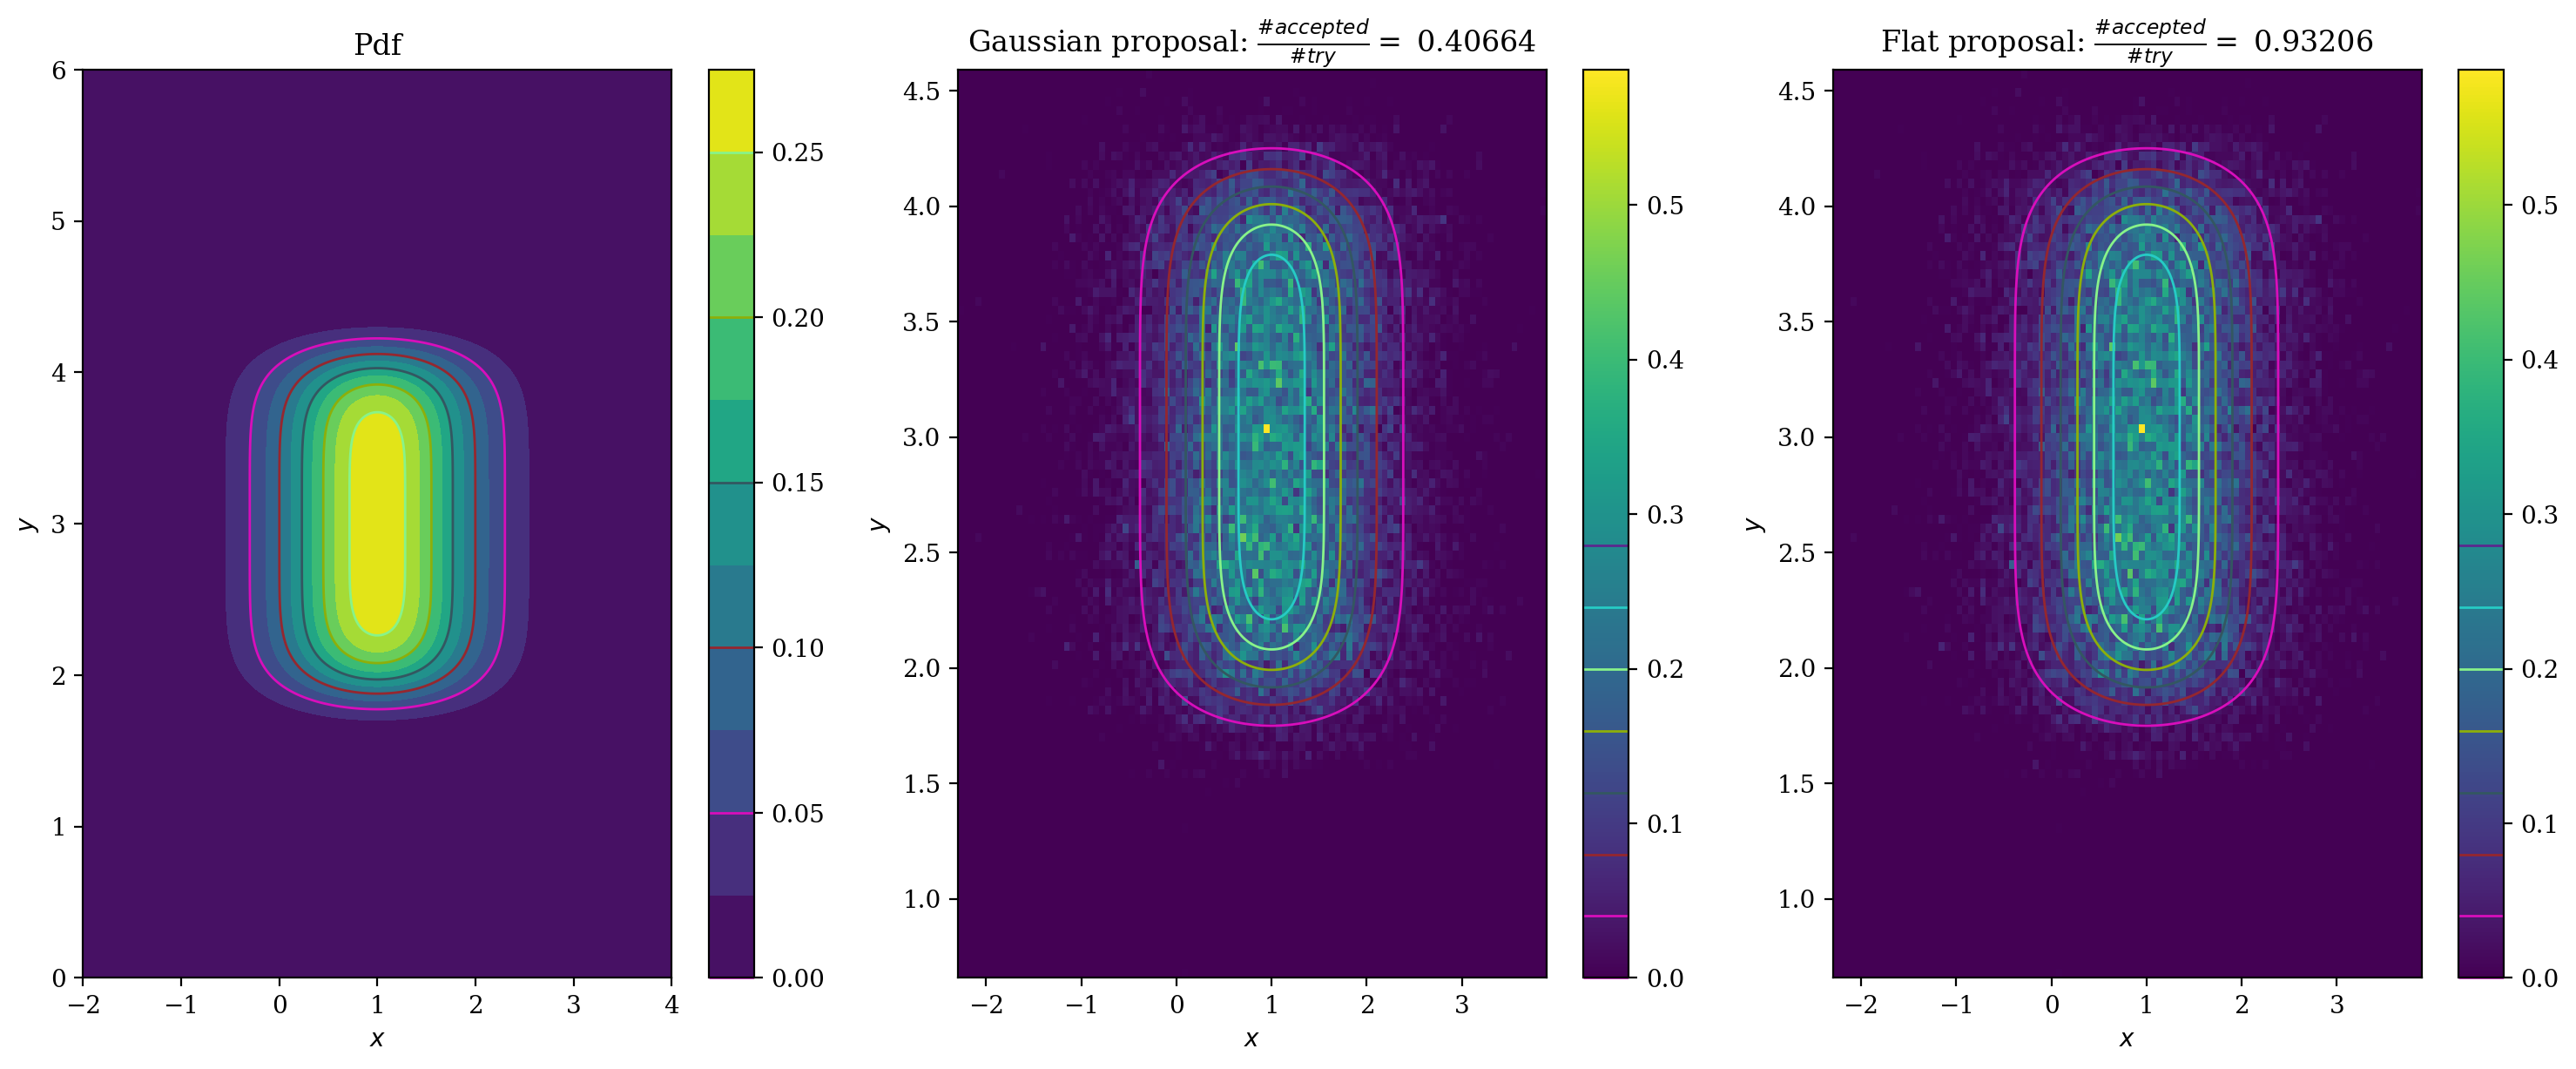

In [11]:
# contour plot the distribution (on generic iso-contours, the default ones work)
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
l = 10

colors = []
for i in range(l):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

CS = ax[0].contourf(X, Y, target_plot, levels=l)
CS2 = ax[0].contour(CS, levels=CS.levels[::2], colors=colors, linewidths=1)

cbar = fig.colorbar(CS, ax=ax[0])
cbar.add_lines(CS2)

CS1 = ax[1].hist2d(x_sample, y_sample, bins=100, density=True)

cbar1 = fig.colorbar(CS1[3], ax=ax[1])
C = ax[1].contour(X, Y, target_plot, colors=colors, linewidths=1)
cbar1.add_lines(C)


CS3 = ax[2].hist2d(x_sample_f, y_sample_f, bins=100, density=True)

cbar2 = fig.colorbar(CS3[3], ax=ax[2])
C1 = ax[2].contour(X, Y, target_plot, colors=colors, linewidths=1)
cbar2.add_lines(C1)

for _ax in ax.flatten():
    _ax.set_xlabel(r'$x$')
    _ax.set_ylabel(r'$y$')
    #_ax.legend()
fig.tight_layout()

ax[0].set_title('Pdf');
ax[1].set_title('Gaussian proposal: ' + r'$\frac{\# accepted}{\# try}=$ ' + str(eff));
ax[2].set_title('Flat proposal: ' + r'$\frac{\# accepted}{\# try}=$ ' + str(eff_f));


In [12]:
# marginalization
pdf_x = np.trapz(target_plot, y, dx=1-6, axis=1)
pdf_y = np.trapz(target_plot, x, dx=1-6, axis=0)

In [13]:
# samp = np.array([x_sample_f,y_sample_f]).reshape([x_sample_f.size,2])

In [14]:
# figure = corner.corner(samp)

In [15]:
# GTC = pygtc.plotGTC(chains=samp);

In [16]:
# GET DIST
# CHAIN CONSUMER

In [17]:
names = ["x","y"]
labels = ["x","y"]

samples_g = getdist.mcsamples.MCSamples(samples=sample,names = names, labels = labels, label='Gaussian proposal')
samples_f = getdist.mcsamples.MCSamples(samples=sample_f,names = names, labels = labels, label='Flat proposal')

Removed no burn in
Removed no burn in


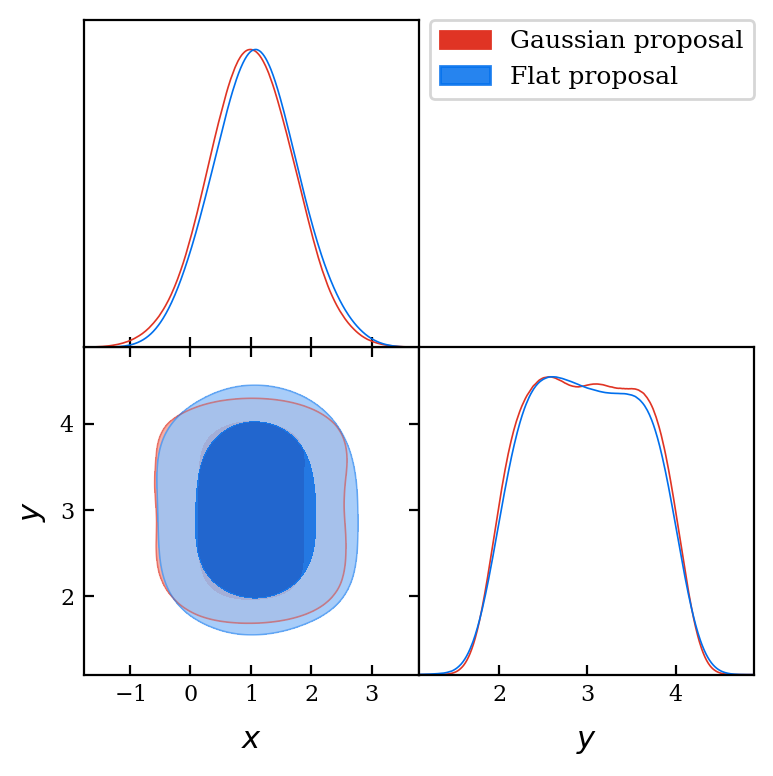

In [18]:
from getdist import plots
g = plots.get_subplot_plotter()
g.triangle_plot([samples_g, samples_f], filled=True)

In [19]:
mean_g = np.array([np.mean(x_sample),np.mean(y_sample)])
mean_f = np.array([np.mean(x_sample_f),np.mean(y_sample_f)])

mode_g = np.array([sp.stats.mode(x_sample)[0],sp.stats.mode(y_sample)[0]])
mode_f = np.array([sp.stats.mode(x_sample_f)[0],sp.stats.mode(y_sample_f)[0]])

median_g = np.array([np.median(x_sample),np.median(y_sample)])
median_f = np.array([np.median(x_sample_f),np.median(y_sample_f)])

std_g = np.array([np.std(x_sample),np.std(y_sample)])
std_f = np.array([np.std(x_sample_f),np.std(y_sample_f)])

cov_g = np.array(np.cov(x_sample,y_sample))
cov_f = np.array(np.cov(x_sample_f,y_sample_f))

In [20]:
print("Gaussian proposal:")
print("Mean= ", mean_g)
print("Mode= ", mode_g)
print("Median= ", median_g)
print("Standard deviation= ", std_g)
print("Covariance = ", cov_g)

print("-----------------------")
print("Flat proposal:")
print("Mean= ", mean_f)
print("Mode= ", mode_f)
print("Median= ", median_f)
print("Standard deviation= ", std_f)
print("Covariance = ", cov_f)

Gaussian proposal:
Mean=  [1.01157433 2.99237311]
Mode=  [0.64155443 3.67892652]
Median=  [1.00947765 2.99298332]
Standard deviation=  [0.71602985 0.63569116]
Covariance =  [[ 5.12703880e-01 -3.12847670e-04]
 [-3.12847670e-04  4.04107293e-01]]
-----------------------
Flat proposal:
Mean=  [1.01157433 2.99237311]
Mode=  [0.64155443 3.67892652]
Median=  [1.00947765 2.99298332]
Standard deviation=  [0.71602985 0.63569116]
Covariance =  [[ 5.12703880e-01 -3.12847670e-04]
 [-3.12847670e-04  4.04107293e-01]]
